<img src="dataset-cover.png" style="width:700px;height:400px">

# Importing the dependencies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data collaction and Analysis

In [2]:
# reading the dataset using pandas
dataset = pd.read_csv("insurance.csv")

In [3]:
#top 5 data
dataset.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [4]:
# no of rows and columes
dataset.shape

(1338, 7)

In [5]:
#getting some informations about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Catagorical Features :-
## sex , smoker , region

In [6]:
#checking the missing values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [7]:
# Statistical Measures of dataset
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\pj900\AppData\Local\Temp\ipykernel_13088\3949062787.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


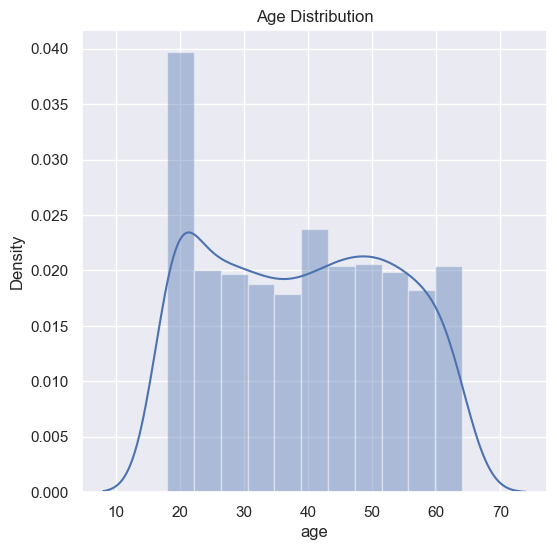

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title("Age Distribution") 
plt.show()

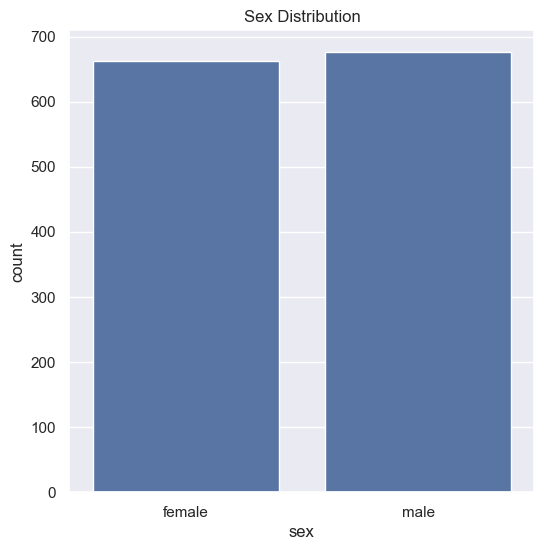

In [9]:
# Gender
plt.figure(figsize=(6,6))
sns.countplot(x="sex" , data=dataset)
plt.title("Sex Distribution")
plt.show()

In [10]:
dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

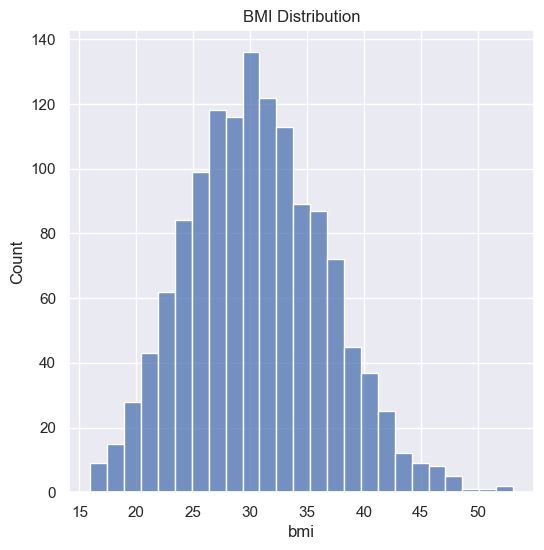

In [11]:
plt.figure(figsize=(6,6))
sns.histplot(dataset['bmi'] )
plt.title("BMI Distribution") 
plt.show()

#### Normal BMI Range --> 18.5 to 24.9

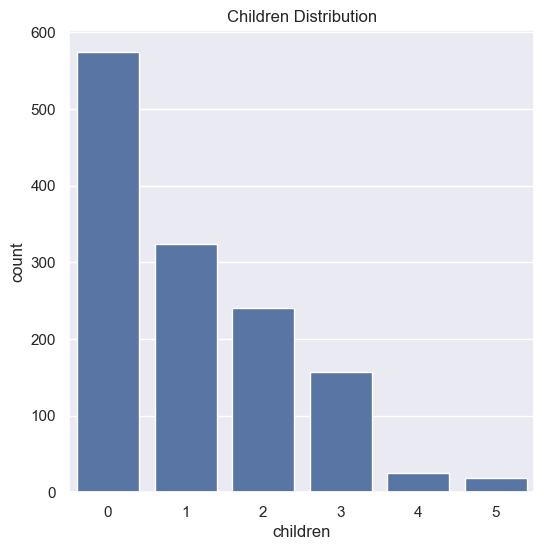

In [12]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x="children" , data=dataset )
plt.title("Children Distribution")
plt.show()

In [13]:
dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

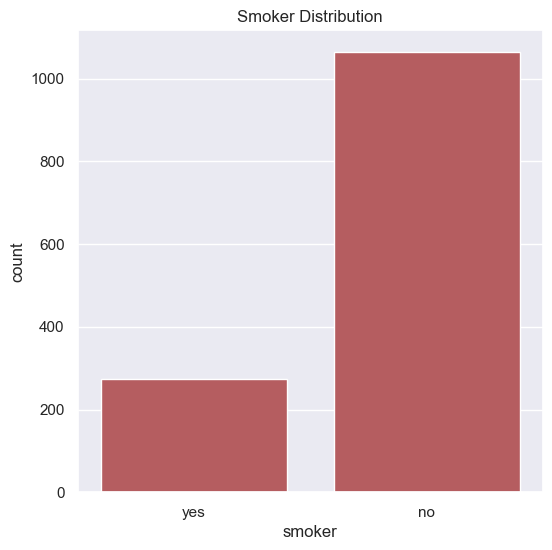

In [14]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x="smoker" , data=dataset , color = 'r')
plt.title("Smoker Distribution")
plt.show()

In [15]:
dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

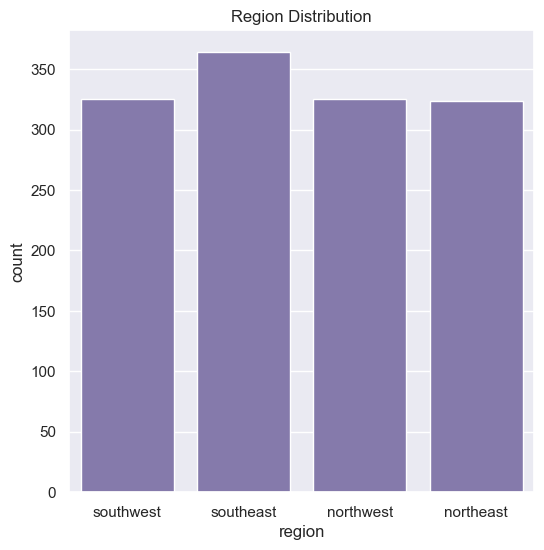

In [16]:
#region	colume 
plt.figure(figsize=(6,6))
sns.countplot(x="region" , data=dataset , color = 'm')
plt.title("Region Distribution")
plt.show()

In [17]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

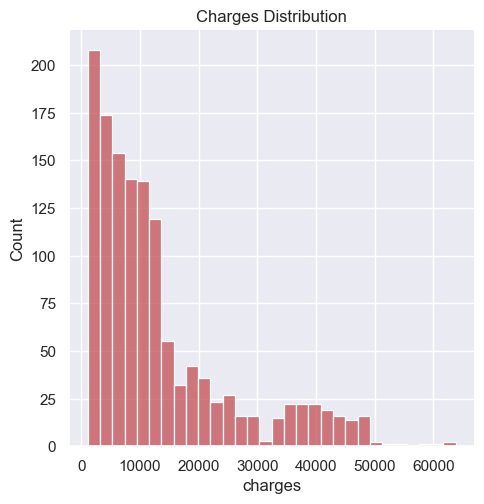

In [18]:
# distribution of charges 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['charges'] , color = 'r')
plt.title("Charges Distribution") 
plt.show()

# Data preprocesssing

### Encoding the catagorical data

In [19]:
# encoding sex column
dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'smoker' column
dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\pj900\AppData\Local\Temp\ipykernel_13088\3016310201.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\pj900\AppData\Local\Temp\ipykernel_13088\3016310201.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\pj900\AppData\Local\Temp\ipykernel_13088\3016310201.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

### Spliting independent and dependent variable

In [20]:
x = dataset.drop(columns='charges', axis=1)
y = dataset['charges']

### Spliting data into training and test set

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

# Model traning 

### linear regression

In [22]:
# creating best fit line 
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [23]:
#prediction on training data
training_data_prediction = regressor.predict(x_train)

In [24]:
# r squared value
r2_train = metrics.r2_score(y_train ,training_data_prediction)
print(f"R sqaure value : {r2_train}")

R sqaure value : 0.751505643411174


In [25]:
#prediction on testing  data
test_data_prediction = regressor.predict(x_test)

In [26]:
# r squared value
r2_test = metrics.r2_score(y_test ,test_data_prediction)
print(f"R sqaure value : {r2_test}")

R sqaure value : 0.7447273869684077


### Build a predictive system

In [27]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


# Final prediction

In [31]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960587


C:\Users\pj900\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
